In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the customers data
customers_data = pd.read_csv('Mall_Customers.csv')
customers_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Exploration

In [5]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Data Preprocessing

In [7]:
customers_data.drop('CustomerID', axis=1, inplace=True)

In [15]:
encoder = LabelEncoder()
customers_data['Encoded Gender'] = encoder.fit_transform(customers_data['Gender'])

In [16]:
numerical_data = customers_data.select_dtypes(np.int)

<ipython-input-16-5452d0daef57>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numerical_data = customers_data.select_dtypes(np.int)


In [ ]:
# Selecting optimal K value for KMeans model using Elbow method
distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(numerical_data)
    distortions.append(kmeanModel.inertia_)

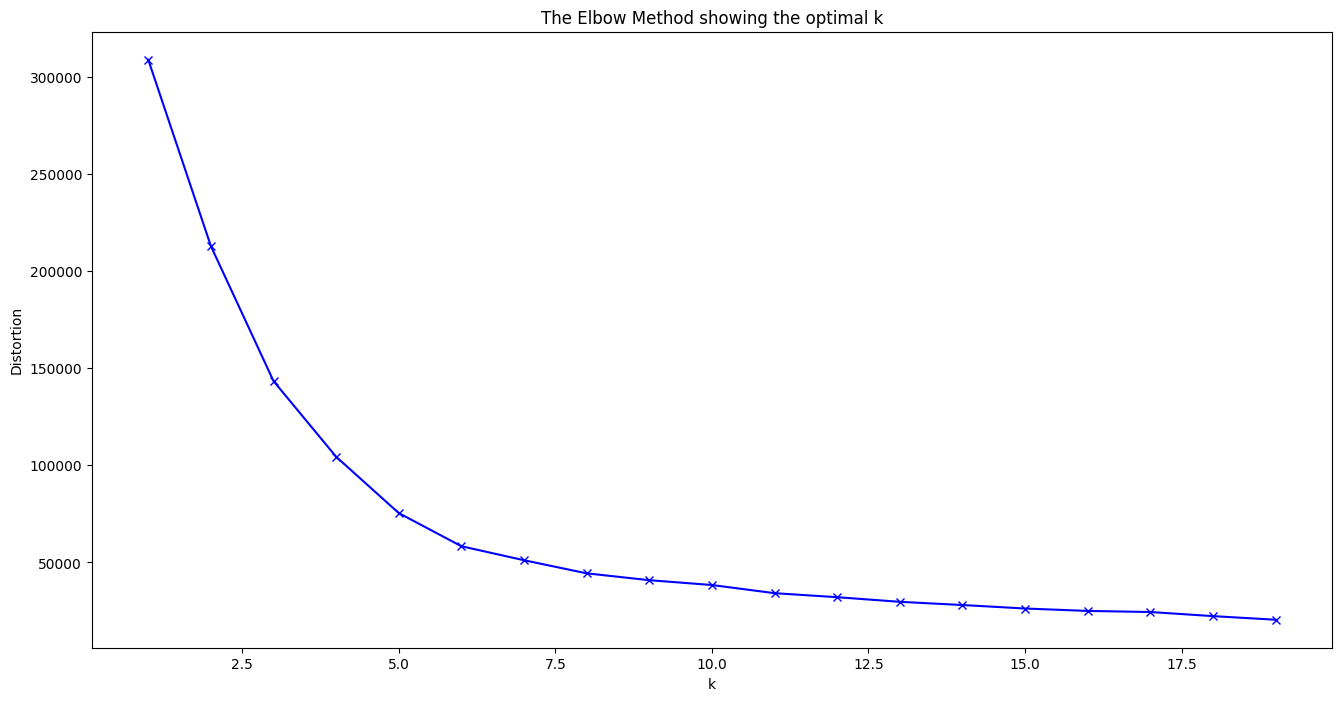

In [49]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [27]:
# From Elbow method the optimal K value is 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(numerical_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [28]:
# Clusters
kmeans.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [52]:
numerical_data['Clusters'] = kmeans.labels_
numerical_data

,Age,Annual Income (k$),Spending Score (1-100),Encoded Gender,Clusters
0,19,15,39,1,0
1,21,15,81,1,4
2,20,16,6,0,0
3,23,16,77,0,4
4,31,17,40,0,0
...,...,...,...,...,...
195,35,120,79,0,2
196,45,126,28,0,1
197,32,126,74,1,2
198,32,137,18,1,1


## Data Visualization

Text(0, 0.5, 'Spending Score')

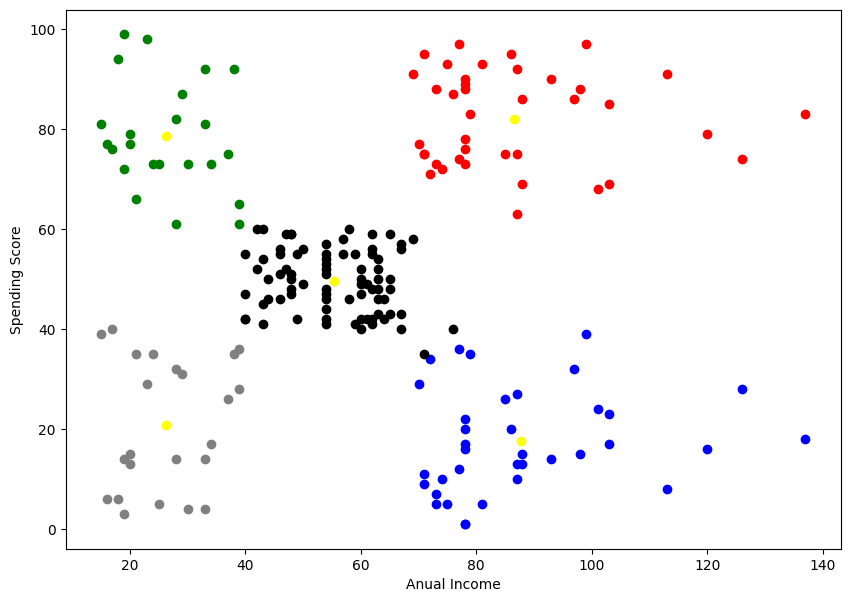

In [86]:
# 2D visualization between Anual Income feature and Spending Score feature
fig = plt.figure(figsize = (10, 7))

plt.scatter(numerical_data.iloc[kmeans.labels_ == 0, 1],numerical_data.iloc[kmeans.labels_ == 0,2], c = 'green')
plt.scatter(numerical_data.iloc[kmeans.labels_ == 1,1],numerical_data.iloc[kmeans.labels_ == 1,2], c = 'blue')
plt.scatter(numerical_data.iloc[kmeans.labels_ == 2,1],numerical_data.iloc[kmeans.labels_ == 2,2], c = 'black')
plt.scatter(numerical_data.iloc[kmeans.labels_ == 3,1],numerical_data.iloc[kmeans.labels_ == 3,2], c = 'red')
plt.scatter(numerical_data.iloc[kmeans.labels_ == 4,1],numerical_data.iloc[kmeans.labels_ == 4,2], c = 'gray')
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], c = "yellow", label = "centroids")

plt.xlabel('Anual Income')
plt.ylabel('Spending Score')

Text(0.5, 0, 'Spending Score')

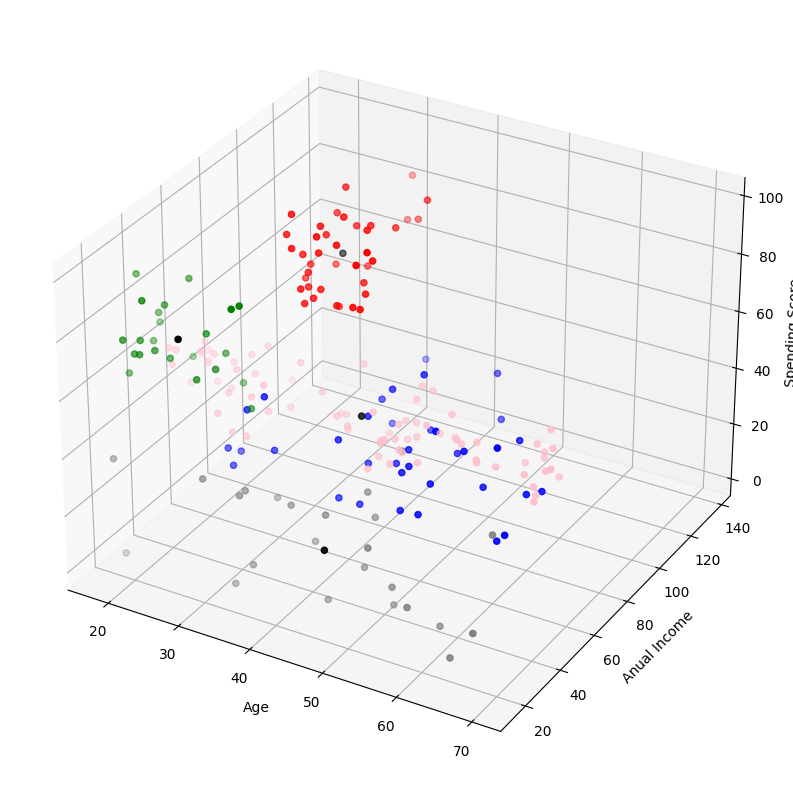

In [82]:
# 3D visualization between Anual Income, Spending Score and Age features
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(numerical_data.iloc[kmeans.labels_ == 0, 0],numerical_data.iloc[kmeans.labels_ == 0,1],numerical_data.iloc[kmeans.labels_ == 0,2], c = 'green')
ax.scatter(numerical_data.iloc[kmeans.labels_ == 1,0],numerical_data.iloc[kmeans.labels_ == 1,1],numerical_data.iloc[kmeans.labels_ == 1,2], c = 'blue')
ax.scatter(numerical_data.iloc[kmeans.labels_ == 2,0],numerical_data.iloc[kmeans.labels_ == 2,1],numerical_data.iloc[kmeans.labels_ == 2,2], c = 'pink')
ax.scatter(numerical_data.iloc[kmeans.labels_ == 3,0],numerical_data.iloc[kmeans.labels_ == 3,1],numerical_data.iloc[kmeans.labels_ == 3,2], c = 'red')
ax.scatter(numerical_data.iloc[kmeans.labels_ == 4,0],numerical_data.iloc[kmeans.labels_ == 4,1],numerical_data.iloc[kmeans.labels_ == 4,2], c = 'gray')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], c = "black", label = "centroids")

ax.set_xlabel('Age')
ax.set_ylabel('Anual Income')
ax.set_zlabel('Spending Score')